# Hackathon - Project_4 - Predictions

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
from matplotlib.pyplot import imshow

import itertools

from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### Read in the test data csv file

In [2]:
df = pd.read_csv("./data/test_data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States


### Feature engineering

In [3]:
df.rename(columns = {"education-num": "education_num", "marital-status": "marital_status",
                    "capital-gain": "capital_gain", "capital-loss": "capital_loss",
                    "hours-per-week": "hours_per_week", "native-country": "native_country"}, inplace = True)

df['is_male'] = df['sex'].map({' Female': 0, ' Male': 1})

df['has_cap_gains'] = (df['capital_gain']>0).astype(int)

df["ed_num*age"] = df["education_num"] * df["age"]

def occ_map(x):
    if x == " Prof-specialty" or x == " Exec-managerial":
        return 1
    else:
        return 0
df["prof_spec_or_manage"] = df["occupation"].map(occ_map)

df['marital_status_dummy'] = df.marital_status.replace([' Married-civ-spouse', ' Married-AF-spouse'], 1)

df.marital_status_dummy.replace([' Never-married',' Divorced', ' Separated',
                                 ' Widowed', ' Married-spouse-absent'], 0, inplace =True)

df['relationship_dummy'] = df.relationship.replace([' Husband', ' Wife', ' Own-child', ' Other-relative' ], 1)

df.relationship_dummy.replace([' Not-in-family', ' Unmarried'], 0, inplace = True)

def edu_map(x):
    if x == 13 or x == 14 or x == 15 or x == 16:
        return 1
    else:
        return 0
df["best_edu"] = df["education_num"].map(edu_map)

df["hour_week*age"] = df["hours_per_week"] * df["age"]

df['edu_sq']=df['education_num']**2

df['married_man']=df['marital_status_dummy']*df['is_male']

df["educ_num*marit_stat"] = df["education_num"] * df["marital_status_dummy"]

df['married*edu']=df['marital_status_dummy']*df['education_num']

df['hours_per_week*marital_status_dummy']= df['marital_status_dummy']*df['hours_per_week']

def usa(x):
    if x == " United-States":
        return 1
    else:
        return 0
df["usa"] = df["native_country"].map(usa)
df['married*USA'] = df['marital_status_dummy']*df['usa']

df['education_num*is_male'] = df['education_num']*df['is_male']

df['education_num*hours_per_week']= df['education_num']*df['hours_per_week']

df['age*marital_status']=df['age']*df['marital_status_dummy']

### Feature Selection

In [4]:
X= df[["educ_num*marit_stat", "marital_status_dummy", "married_man", "ed_num*age", "edu_sq", "education_num",
            "best_edu", "hour_week*age", "prof_spec_or_manage", "has_cap_gains", "relationship_dummy",
            "age", "hours_per_week", "capital_gain", "is_male", "capital_loss"]]


### Modeling

In [5]:
gb = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Read in the train data csv file

In [6]:
train = pd.read_csv('./data/cleaned_large_train.csv')

### Train Feature Selection

In [7]:
X_train= train[["educ_num*marit_stat", "marital_status_dummy", "married_man", "ed_num*age", "edu_sq",
                "education_num", "best_edu", "hour_week*age", "prof_spec_or_manage", "has_cap_gains",
                "relationship_dummy","age", "hours_per_week", "capital_gain", "is_male", "capital_loss"]]
y_train = train['target']


In [8]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### Predictions

In [9]:
proba = gb.predict_proba(X)

In [10]:
wage_pred = pd.DataFrame(proba, columns=['under50k', 'wage'])

In [11]:
result = wage_pred[['wage']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15240e80>]],
      dtype=object)

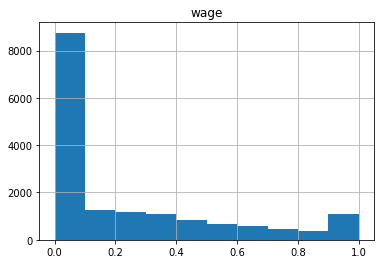

In [12]:
result.hist()

### Save Predictions

In [13]:
result.to_csv("./predictions/predictions.csv", index = False)